# Сборный проект 1:   
# Исследование для интернет-магазина компьютерных игр.

Исследование для интернет-магазина «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation).Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

В доступе данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Не важно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

### Описание данных:

- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы долларов)
- EU_sales — продажи в Европе (миллионы долларов)
- JP_sales — продажи в Японии (миллионы долларов)
- Other_sales — продажи в других странах (миллионы долларов)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

import warnings
warnings.filterwarnings("ignore")

### 1. Знакомство с данными.

Откроем файл с данными и изучим общую информацию:

In [2]:
games = pd.read_csv('C:/Users/Olga/datasets/games.csv')
games.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [3]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
# Проверим данные на явные дубликаты:

games.duplicated().sum()

0

In [5]:
# Выведем количество пропусков:

games.isna().sum()  

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

### 2. Подготовка данных

Заменим названия столбцов (приведем к нижнему регистру):

In [6]:
games.columns = games.columns.str.lower()

Работу с пропусками проведем по следующему плану:

- столбцы **name** и **genre**: в каждом пропущено по 2 значения, это ничтожно малая часть от общего объема данных, поэтому строки с этими пропусками просто удалим.


- столбец **year_of_release**: доля пропущенных значений составляет 1.6% от общего объема, можно удалить.


- столбцы **critic_score** и **user_score**: строк с пропусками в столбцах с оценками очень много, удалить их - значит, лишиться 2/3 данных. В то же время, замена этих пропусков медианой или средним может негативно повлиять на последующий анализ и исказить результаты статистических тестов. Я думаю, что если данных об оценках и рейтинге нет, то это скорее всего потому, что просто никто не проставил рейтинг. То есть игра прошла мимо аудитории и критиков незамеченной. Видимо, это как раз тот случай, когда пропуски лучше вообще не трогать.


- столбец **rating**: эти пропуски нельзя заменить на нули, проигнорировать или удалить, поскольку речь идет о рейтинге от ESRB, т.е. не о случайном значении. Пропуски здесь могли образоваться из-за того, что игре вообще не присваивали рейтинг (например, ESRB вообще не оценивала данный игровой контент по каким-то причинам). Считаю правильным заменить пропуски на какой-то маркер, по которому в дальнейшем можно будет при необходимости сгруппировать проанализировать данные, например, на значение 'undefined'.

In [7]:
games = games.dropna(subset=['name', 'genre', 'year_of_release'])

In [8]:
games['rating'] = games['rating'].fillna('undefined')

В столбце **user_score** есть неопределенное значение 'tbd', которое нужно убрать, поскольку оно затрудняет дальнейшую обработку данных.
Заменим 'tbd' на NaN вещественного типа:

In [9]:
games.loc[games['user_score'] == 'tbd', 'user_score'] = float('NaN')

Преобразуем типы данных: столбец **year_of_release** приведем к целочисленному типу, столбец **user_score** из строки преобразуем в вещеcтвенный тип.

In [10]:
games['year_of_release'] = games['year_of_release'].astype('int16')
games['user_score'] = pd.to_numeric(games['user_score'])

In [11]:
# Проверим, как прошла замена типов и заполнение пропусков:

games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
name               16444 non-null object
platform           16444 non-null object
year_of_release    16444 non-null int16
genre              16444 non-null object
na_sales           16444 non-null float64
eu_sales           16444 non-null float64
jp_sales           16444 non-null float64
other_sales        16444 non-null float64
critic_score       7983 non-null float64
user_score         7463 non-null float64
rating             16444 non-null object
dtypes: float64(6), int16(1), object(4)
memory usage: 1.4+ MB


Создадим столбец **total_sales**, куда запишем суммарные продажи во всех регионах.

In [12]:
games['total_sales'] = games[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,undefined,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,undefined,31.38


**ВЫВОД:**
В результате предобработки:
- были удалены данные с пропусками в столбцах **name**, **name**, **year_of_release**, что составило 1.6% от общего объема
- пропуски в столбце **rating** были заполнены значением *undefined*
- были обработаны некорректные значения *tbd* в столбце **user_score**
- данные были приведены к подходящим для дальнейшего исследования типам

Данные готовы к дальнейшему анализу.

#### 3.1. Сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

In [13]:
games.pivot_table(index='year_of_release', values='name', aggfunc='count')\
.reset_index().rename(columns={'name':'number_of_games'})

,year_of_release,number_of_games
0,1980,9
1,1981,46
2,1982,36
3,1983,17
4,1984,14
5,1985,14
6,1986,21
7,1987,16
8,1988,15
9,1989,17


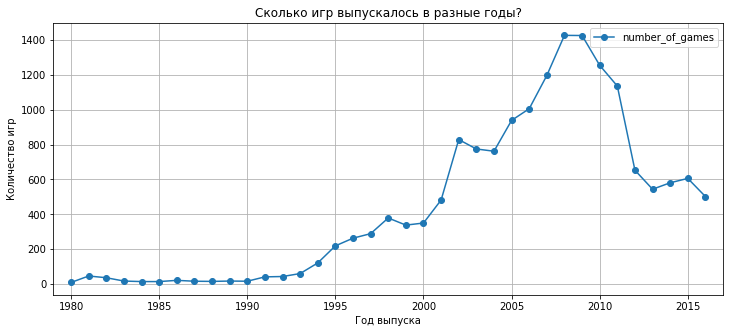

In [14]:
games.pivot_table(index='year_of_release', values='name', aggfunc='count').reset_index().\
rename(columns={'name':'number_of_games'}).\
plot(x='year_of_release', y='number_of_games', style='o-', xlim=(1979, 2017), grid=True, figsize=(12,5), \
     title='Cколько игр выпускалось в разные годы?')

plt.xlabel('Год выпуска')
plt.ylabel('Количество игр')
plt.show()

In [15]:
games.pivot_table(index='year_of_release', values='name', aggfunc='count')\
.reset_index().rename(columns={'name':'number_of_games'}).query('1980 <= year_of_release <= 2000').sum()

year_of_release    41790
number_of_games     2324
dtype: int64

In [16]:
games.pivot_table(index='year_of_release', values='name', aggfunc='count')\
.reset_index().rename(columns={'name':'number_of_games'}).query('2001 <= year_of_release <= 2016').sum()

year_of_release    32136
number_of_games    14120
dtype: int64

**ВЫВОД:** 
На графике видно, что в период с 1980 по 2000гг количество выпускаемых игр существенно меньше по сравнению с релизом в период 2001-2016гг. Если подсчитать точнее, то за 16 лет периода 2000-2016гг было выпущено в 6 раз больше игр, чем за предыдущие 20 лет.

Очевидно, что для нашей цели - планирования кампании на 2017-й год - достаточно подробно проанализировать период 2000-2016, отбросив все данные до 2000г.

#### 3.2. Как менялись продажи по платформам? Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

In [17]:
games['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [18]:
games.pivot_table(index='platform', values='total_sales', aggfunc=('count','sum')).\
sort_values(by='sum', ascending=False).reset_index()

,platform,count,sum
0,PS2,2127,1233.56
1,X360,1232,961.24
2,PS3,1306,931.34
3,Wii,1286,891.18
4,DS,2121,802.78
5,PS,1190,727.58
6,PS4,392,314.14
7,GBA,811,312.88
8,PSP,1193,289.53
9,3DS,512,257.81


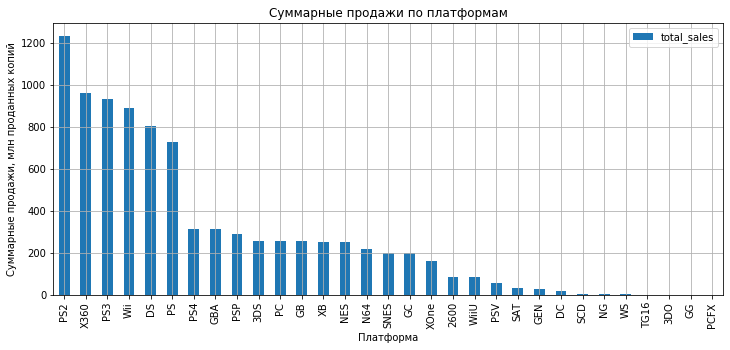

In [19]:
games.pivot_table(index='platform', values='total_sales', aggfunc=('count','sum')).\
sort_values(by='sum', ascending=False).reset_index().rename(columns={'sum':'total_sales'}).\
plot(x='platform', y='total_sales', kind='bar', grid=True, figsize=(12,5), title='Суммарные продажи по платформам')
plt.xlabel('Платформа')
plt.ylabel('Суммарные продажи, млн проданных копий')
plt.show()

На графике хорошо видно, какие из платформ характеризуются наибольшими суммарными продажами - это ТОП-6: PS2, X360, PS3, Wii, DS, PS. Выделим данные по ТОП-6 в отдельный срез, и построим график распределения по годам. При этом, для каждой из топовых платформ возьмем только данные за соответствующий актуальный период - с 2000 года.  
Этот график поможет понять, за какой характерный срок появляются новые и исчезают старые платформы.

In [20]:
top6_platform = ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']

games.query('platform in @top6_platform and year_of_release >= 2000')\
.pivot_table(index='platform',columns='year_of_release',values='total_sales', aggfunc='sum')

year_of_release,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
platform,,,,,,,,,,,,,,,,,
DS,NaN,NaN,NaN,NaN,17.27,130.14,119.81,146.94,145.31,119.54,85.02,26.18,11.01,1.54,NaN,NaN,NaN
PS,96.37,35.59,6.67,2.07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PS2,39.17,166.43,205.38,184.31,211.81,160.66,103.42,75.99,53.90,26.40,5.64,0.45,NaN,NaN,NaN,NaN,NaN
PS3,NaN,NaN,NaN,NaN,NaN,NaN,20.96,73.19,118.52,130.93,142.17,156.78,107.36,113.25,47.76,16.82,3.60
Wii,NaN,NaN,NaN,NaN,NaN,NaN,137.15,152.77,171.32,206.97,127.95,59.65,21.71,8.59,3.75,1.14,0.18
X360,NaN,NaN,NaN,NaN,NaN,8.25,51.62,95.41,135.26,120.29,170.03,143.84,99.74,88.58,34.74,11.96,1.52


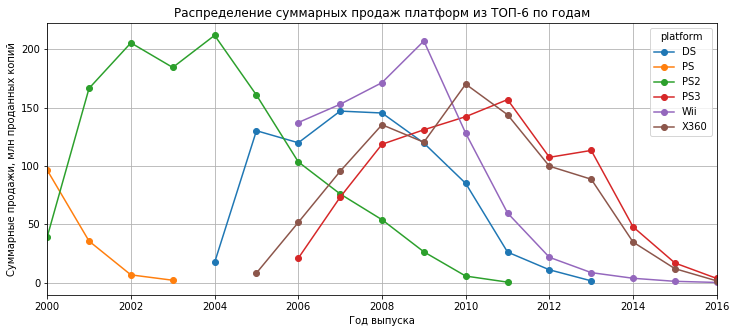

In [21]:
games.query('platform in @top6_platform and year_of_release >= 2000')\
.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')\
.plot(style='o-', grid=True, figsize=(12,5), title='Распределение суммарных продаж платформ из ТОП-6 по годам')

plt.xlabel('Год выпуска')
plt.ylabel('Суммарные продажи, млн проданных копий')
plt.show()

**ВЫВОД:** 

- За какой характерный срок появляются новые и исчезают старые платформы?

Из графика видно, что **средний цикл жизни игровой платформы составляет 10 лет.** Первые 2-3 года уходят на раскрутку новой платформы, затем идет период максимальной эффективности (околопиковые продажи игр на базе платформы), который длится еще в среднем 2-3 года, после чего цикл медленно и уверенно идет на спад, и в результате платформа устаревает и сменяется новым продуктом.

#### 3.3. Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.

Средний цикл жизни платформы 10лет, однако, в такой динамично меняющейся индустрии как компьютерные игры брать столь продолжительный  период для прогнозирования на будущее не рационально, поскольку есть риск захватить уже устаревшие и отжившие тренды и получить не актуальные выводы. 

Найдем перспективные варианты, сузив зону анализа до последних 3-х лет. Иными словами, в дальнейшей работе примем за актуальный период с 2014 по 2016 включительно.

Построим распределение продаж по всем платформам за этот период:

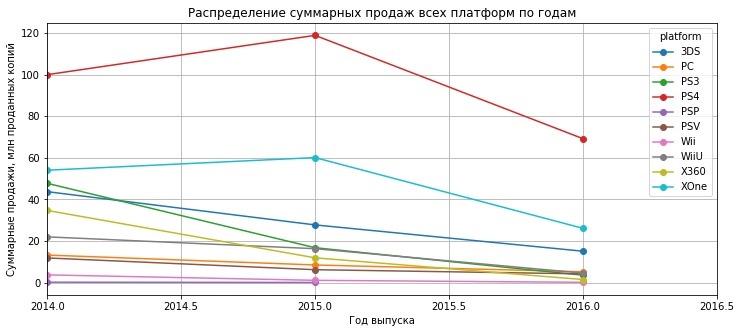

In [22]:
games.query('2014 <= year_of_release <= 2016')\
.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')\
.plot(style='o-', grid=True, figsize=(12,5), xlim=(2014, 2016.5), title='Распределение суммарных продаж всех платформ по годам')

plt.xlabel('Год выпуска')
plt.ylabel('Суммарные продажи, млн проданных копий')
plt.show()

In [23]:
games.query('year_of_release >= 2010')\
.pivot_table(index='platform',columns='year_of_release',values='total_sales', aggfunc='sum')

year_of_release,2010,2011,2012,2013,2014,2015,2016
platform,,,,,,,
3DS,NaN,63.20,51.36,56.57,43.76,27.78,15.14
DS,85.02,26.18,11.01,1.54,NaN,NaN,NaN
PC,24.28,35.03,23.22,12.38,13.28,8.52,5.25
PS2,5.64,0.45,NaN,NaN,NaN,NaN,NaN
PS3,142.17,156.78,107.36,113.25,47.76,16.82,3.60
PS4,NaN,NaN,NaN,25.99,100.00,118.90,69.25
PSP,35.04,17.82,7.69,3.14,0.24,0.12,NaN
PSV,NaN,4.63,16.19,10.59,11.90,6.25,4.25
Wii,127.95,59.65,21.71,8.59,3.75,1.14,0.18


**ВЫВОД:** 
Самое первое что бросается в глаза - это тренд на падение продаж для всех платформ. 

Старые лидеры продаж - **платформы PS2, DS, Wii, X360, PS3** уже безнадежно устарели. Продажи по некоторым из них обнулились задолго до 2016года, а другие к 2016-му еще присутствуют на рынке, но с близкими к нулю продажами. Очевидно, что не стоит опираться на них при построении прогноза на 2017 год.

Сопоставив график и таблицу распределния продаж по годам, можно сделать вывод, что потенциально прибыльными являются платформы: 
- **PS4** - лидер среди потенциально прибыльных платформ с показателем 69.25 млн проданных копий.
- **XOne** - показатель продаж к году снижается, как и у всех остальных, но тем не менее все еще значительный - 26.15 млн копий в 2016-м.
- **3DS** - несмотря на то, что продажи к 2016году упали в четыре раза по сравнению со стартовым 2011-м годом (и почти вдвое по сравнению с предыдущим 2015-м), эта платформа все еще показывает неплохой результат по сравнению с другими - 15млн проданных копий.  
- **PC** - продажи в 2016-м составили 5.25 млн проданных копий.
- **WiiU** - продажи в 2016-м составили 4.6 млн проданных копий.

Оставшиеся "живые" платформы - DC, PSV, PS3, в 2016-м году показали результат менее 4.5 млн копий, и потенциально выгодными не являются.

На графике также видно, что несколько платформ "умерли" еще до 2010-го, и к 2014-2016гг продаж у них нет, поэтому логично будет отсечь данные до 2014-го года включительно, чтобы избавиться от ненужных устаревших данных.

Итак, всю дальнейшую работу будем вести с данными по потенциально прибыльным платформам и за период от 2014 года.

#### 3.4. Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам.

In [24]:
high_potential_platforms = ['PS4', 'XOne', '3DS', 'PC', 'WiiU']

games.query('platform in @high_potential_platforms and year_of_release >=2014')\
.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False).reset_index()

,platform,total_sales
0,PS4,288.15
1,XOne,140.36
2,3DS,86.68
3,WiiU,42.98
4,PC,27.05


In [25]:
for platform in high_potential_platforms:
    parameters = games[games['platform'] == platform]['total_sales'].describe()
    print('Данные для платформы:', platform)
    print(parameters)
    print()

Данные для платформы: PS4
count    392.000000
mean       0.801378
std        1.609456
min        0.010000
25%        0.060000
50%        0.200000
75%        0.730000
max       14.630000
Name: total_sales, dtype: float64

Данные для платформы: XOne
count    247.000000
mean       0.645020
std        1.036139
min        0.010000
25%        0.060000
50%        0.220000
75%        0.685000
max        7.390000
Name: total_sales, dtype: float64

Данные для платформы: 3DS
count    512.000000
mean       0.503535
std        1.441271
min        0.010000
25%        0.050000
50%        0.120000
75%        0.332500
max       14.600000
Name: total_sales, dtype: float64

Данные для платформы: PC
count    957.000000
mean       0.267252
std        0.679745
min        0.010000
25%        0.020000
50%        0.050000
75%        0.170000
max        8.010000
Name: total_sales, dtype: float64

Данные для платформы: WiiU
count    147.000000
mean       0.559116
std        1.058836
min        0.010000
25%      

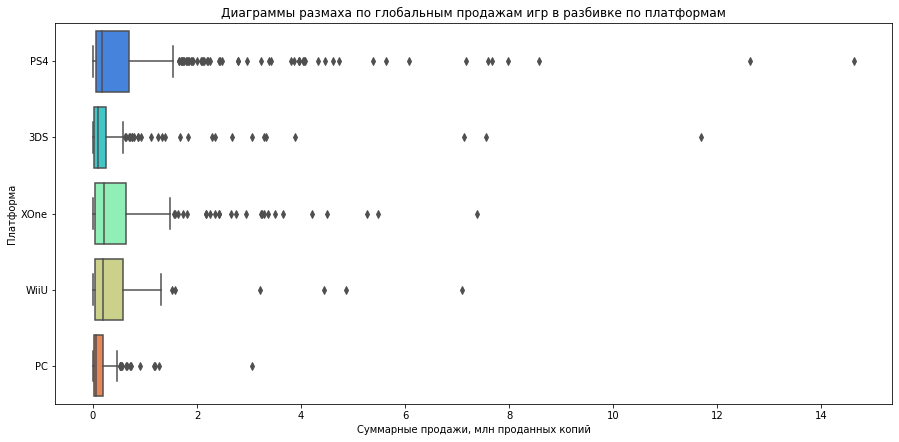

In [26]:
fig, ax = plt.subplots(figsize=(15,7))
sns.boxplot(x='total_sales', y='platform', data=games.query('platform in @high_potential_platforms and year_of_release >=2014'),\
            palette='rainbow')
plt.xlabel('Суммарные продажи, млн проданных копий')
plt.ylabel('Платформа')
plt.title('Диаграммы размаха по глобальным продажам игр в разбивке по платформам')
plt.show()

**ВЫВОД:**

Велика ли разница в продажах? А в средних продажах на разных платформах? Опишите результат.

Из графика можно сделать следующие выводы (для выбранного периода от 2009г):

1. Самые большие продажи у игр на базе платформ PS4 и XOne. В целом, нормальные  продажи по этим лидерам не отличаются существенно и находятся в одном диапазоне - до 2 млн. Средние значения также находятся в одном диапазоне - примерно около 0.7-0.8 млн копий. Большая часть нормальных значений лежит в диапазоне до 1 млн. Для обеих платформ характерно наличие значительного количества выбросов с аномально высокими значениями продаж.
2. Средние показатели у платформ WiiU и 3DS, однако здесь отличия более существенные: у WiiU среднее 0.56млн и большая часть нормальных значений лежит в диапазоне до 0.52млн; у 3DS среднее 0.5, однако большая часть нормальных значений лежит в диапазоне до 0.32млн. У 3DS значительно больше выбросов.
3. Самые низкие продажи у платформ РС: средние 0.23 и 0.13 млн соответсвенно, продажи в диапазоне до 0.2млн. 

#### 3.5. Как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков?

Чтобы ответить на этот вопрос, построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. Создадим срез, куда войдут данные начиная с 2014-го года. Кроме того, чтобы убрать выбросы, оставим в срезе только продажи до 2 млн копий.

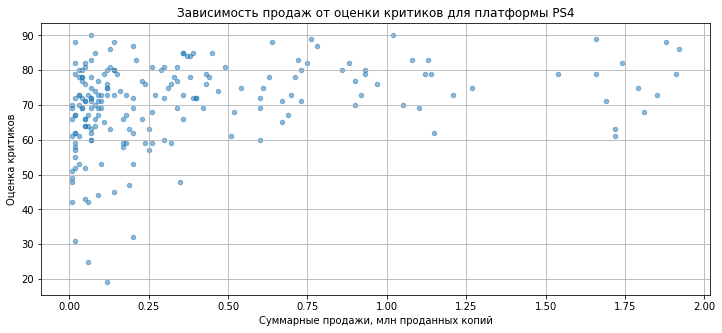

Коэффициент корреляции между оценками критиков и продажами для платформы PS4 : 0.2970500456060429




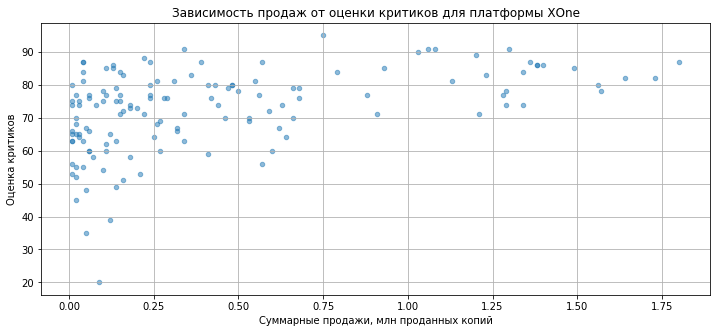

Коэффициент корреляции между оценками критиков и продажами для платформы XOne : 0.4567469502772193




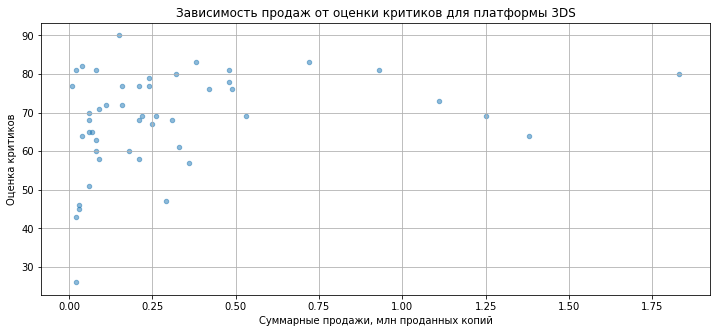

Коэффициент корреляции между оценками критиков и продажами для платформы 3DS : 0.2743563572973316




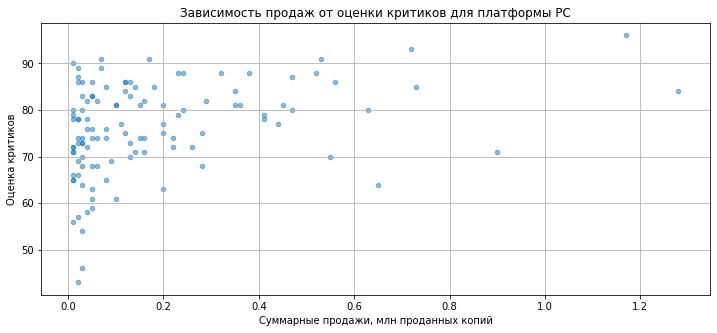

Коэффициент корреляции между оценками критиков и продажами для платформы PC : 0.3354198293873901




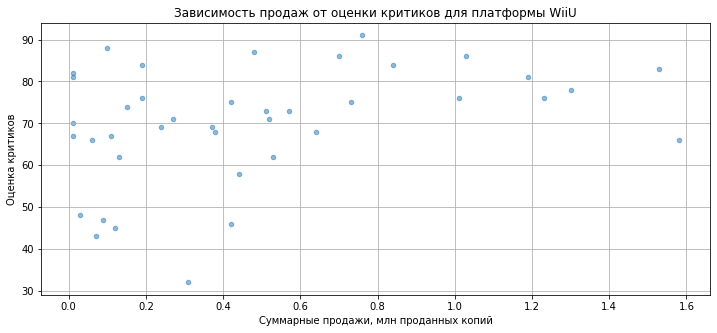

Коэффициент корреляции между оценками критиков и продажами для платформы WiiU : 0.35773949758479484




In [27]:
games_after_2014 = games.query('year_of_release >= 2014 and total_sales <= 2')

for platform in high_potential_platforms:
    games_after_2014.loc[games_after_2014['platform'] == platform].\
    plot(x='total_sales', y='critic_score', kind='scatter', alpha=0.5, grid=True, figsize=(12, 5),\
         title=('Зависимость продаж от оценки критиков для платформы '+ platform))
    plt.xlabel('Суммарные продажи, млн проданных копий')
    plt.ylabel('Оценка критиков')
    plt.show()
    print('Коэффициент корреляции между оценками критиков и продажами для платформы', platform, ':', \
          games_after_2014.loc[games_after_2014['platform'] == platform]['total_sales'].\
          corr(games_after_2014.loc[games_after_2014['platform'] == platform]['critic_score']))
    print()
    print()

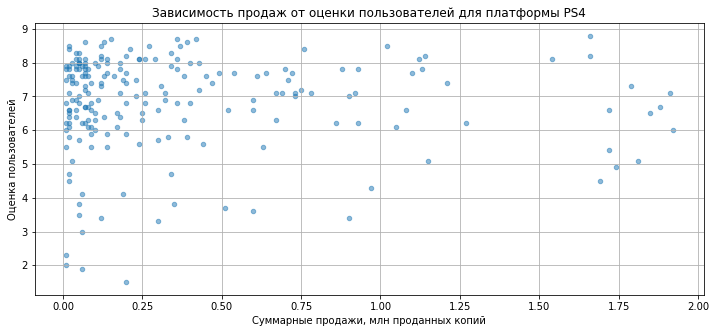

Коэффициент корреляции между оценками пользователей и продажами для платформы PS4 : -0.02170924727150861




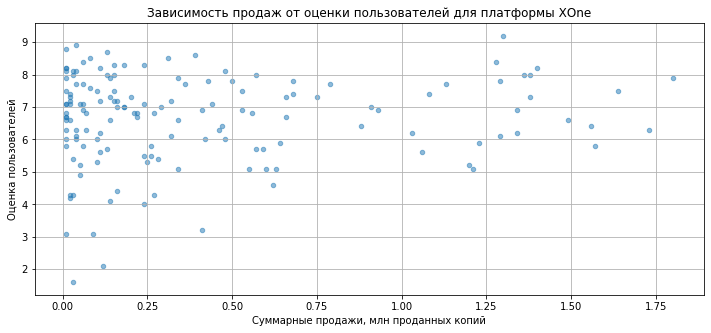

Коэффициент корреляции между оценками пользователей и продажами для платформы XOne : 0.08951458969238116




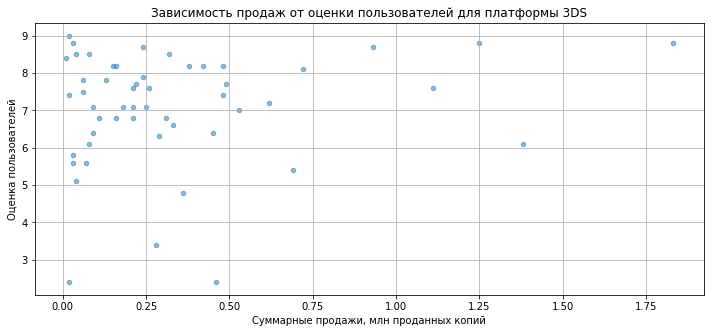

Коэффициент корреляции между оценками пользователей и продажами для платформы 3DS : 0.15144666906432191




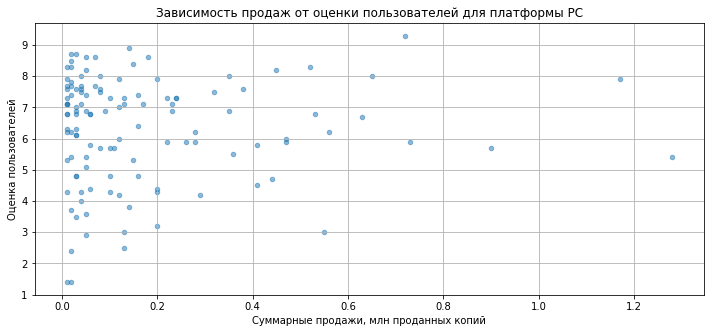

Коэффициент корреляции между оценками пользователей и продажами для платформы PC : 0.03845737441479659




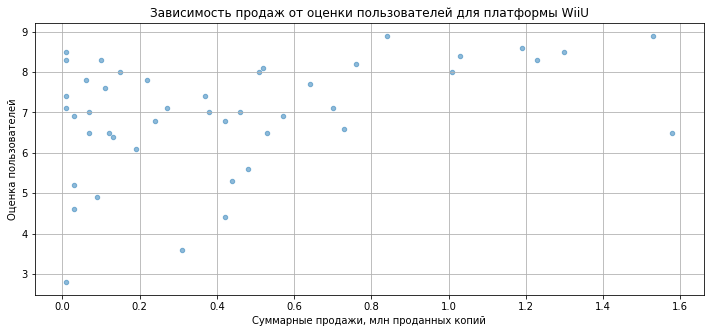

Коэффициент корреляции между оценками пользователей и продажами для платформы WiiU : 0.38922531009653877




In [28]:
for platform in high_potential_platforms:
    games_after_2014.loc[games_after_2014['platform'] == platform].\
    plot(x='total_sales', y='user_score', kind='scatter', alpha=0.5, grid=True, figsize=(12, 5),\
         title=('Зависимость продаж от оценки пользователей для платформы '+ platform))
    plt.xlabel('Суммарные продажи, млн проданных копий')
    plt.ylabel('Оценка пользователей')
    plt.show()
    print('Коэффициент корреляции между оценками пользователей и продажами для платформы', platform, ':', \
          games_after_2014.loc[games_after_2014['platform'] == platform]['total_sales'].\
          corr(games_after_2014.loc[games_after_2014['platform'] == platform]['user_score']))
    print()
    print()


**ВЫВОД:**
Из диаграмм рассеяния видно, что оценка как критиков, так и пользователей не так существенно влияет на продажи, как ожидалось.

И в том, и в другом случае основная масса - это продукт с оценкой от 4 до 8 (в случае с пользователями) или от 40 до 80 (критики) и продажами до 0.5 млн.

Игры с оценками от 6 до 8 и от 60 до 80 характеризуются как продажами до 0.5, так и 0.5-1млн.

Однако, у игр с продажами 1-1.5млн оценки пользователей также лежат в пределах 6-8. Правда, оценки критиков для игр с такими продажами выше - от 70 до 90.

Зависимость продаж от оценок критиков - прямая, поскольку коэффициенты корреляции положительные. 

Зависимость продаж от оценок пользователей характеризуется как положительными (платформы XOne, 3DS, WiiU), так и отрицательными значениями коэффициента корреляции (платформы PS4 и PC). 

Сравнение коэффициентов корреляции говорит о том, что зависимость продаж от оценки критиков сильнее, чем от оценки пользователей. Зависимость продаж от оценки пользователей, хоть и есть, но откровенно слабее.

#### 3.6. Общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

In [29]:
games.query('year_of_release >= 2014').pivot_table(index='genre', values='total_sales', aggfunc='sum').\
sort_values(by='total_sales', ascending=False)

,total_sales
genre,
Action,199.36
Shooter,170.94
Sports,109.48
Role-Playing,101.44
Misc,37.55
Fighting,28.22
Racing,27.52
Platform,18.09
Adventure,17.55


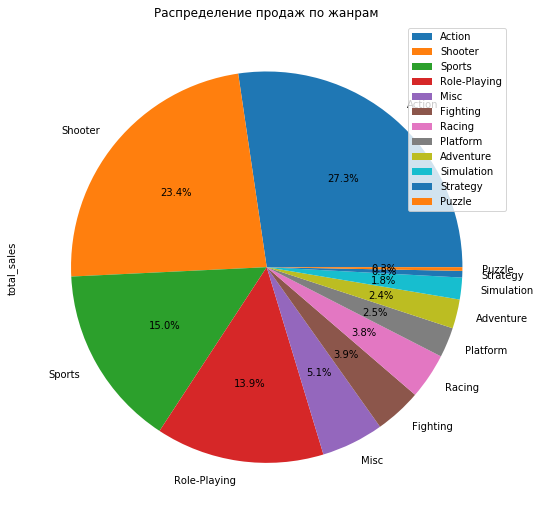

In [30]:
games.query('year_of_release >= 2014').pivot_table(index='genre', values='total_sales', aggfunc='sum').\
sort_values(by='total_sales', ascending=False).\
plot(y='total_sales', kind='pie', figsize=(9, 9), autopct='%1.1f%%', title='Распределение продаж по жанрам')
plt.show()

**ВЫВОД:**

Самые прибыльные жанры: Action - 199 млн проданных копий, что составляет 27.3% от общих продаж, и Shooter - 171 млн проданных копий, что составляет 23.4% от общих продаж.

Второе место делят Sports (15%) и Role-Playing (14%)  - 109 и 101 млн соответсвенно.

Далее идут 8 жанров с суммарными продажами 20 % на всех: Misc, Platform, Rasing, Fighting, Simulation, Adventure, Strategy и Puzzle. 

Strategy(4млн, что составляет 0.5%) и Puzzle(2.2 млн - это всего 0.3%) - самые малопродаваемые (видимо потому, что сложные).

### 4. Портрет пользователя каждого региона.

Определите для пользователя каждого региона (NA, EU, JP):

1. Самые популярные платформы (топ-5). Опишите различия в долях продаж.
2. Самые популярные жанры (топ-5). Поясните разницу.
3. Влияет ли рейтинг ESRB на продажи в отдельном регионе?

#### 4.1. Самые популярные платформы (топ-5). 

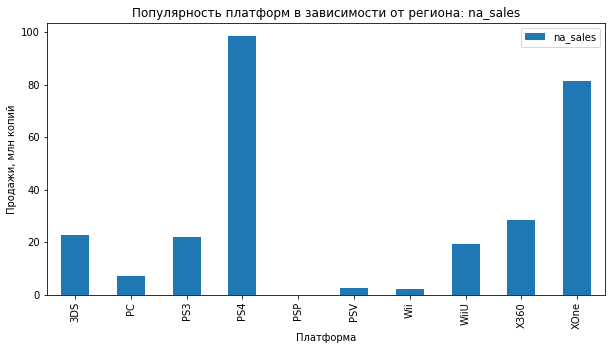


ТОП-5 платформ по регионам: na_sales

  platform  na_sales
0      PS4     98.61
1     XOne     81.27
2     X360     28.30
3      3DS     22.64
4      PS3     22.05





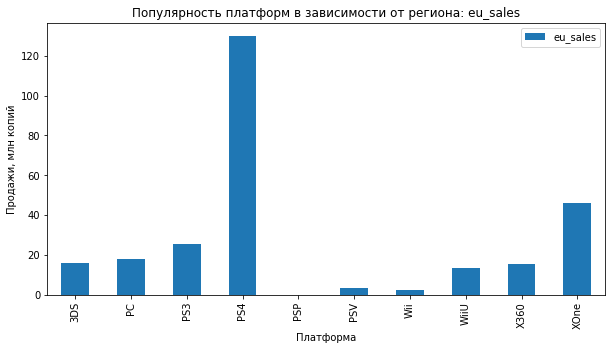


ТОП-5 платформ по регионам: eu_sales

  platform  eu_sales
0      PS4    130.04
1     XOne     46.25
2      PS3     25.54
3       PC     17.97
4      3DS     16.12





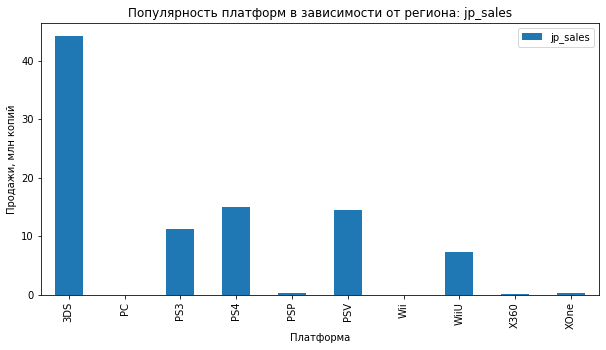


ТОП-5 платформ по регионам: jp_sales

  platform  jp_sales
0      3DS     44.24
1      PS4     15.02
2      PSV     14.54
3      PS3     11.22
4     WiiU      7.31





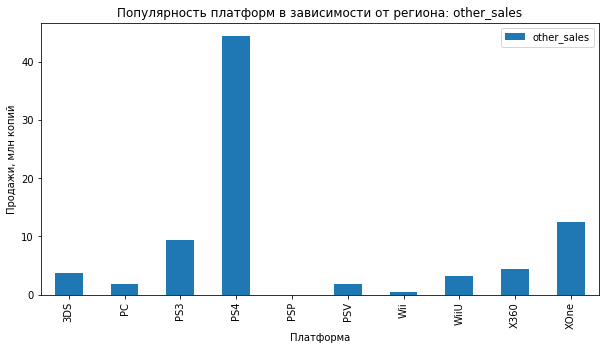


ТОП-5 платформ по регионам: other_sales

  platform  other_sales
0      PS4        44.48
1     XOne        12.52
2      PS3         9.37
3     X360         4.35
4      3DS         3.68





In [31]:
columns = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']

for col in columns:
    games.query('year_of_release >= 2014').pivot_table(index='platform', values=col, aggfunc='sum').\
    plot(y=col, kind='bar', figsize=(10, 5), title='Популярность платформ в зависимости от региона: '+col)
    plt.xlabel('Платформа')
    plt.ylabel('Продажи, млн копий')
    plt.show()
    print()
    print('ТОП-5 платформ по регионам: '+col)
    print()
    print(games.query('year_of_release >= 2014').\
          pivot_table(index='platform', values=col, aggfunc='sum').\
          sort_values(by=col, ascending=False).head().reset_index())
    print()
    print()
    print()

**ВЫВОД:** 


TOP-5 платформ для Северной Америки (NA) в порядке уменьшения доли продаж: PS4, XOne, X360, 3DS, PS3. Из них "живыми" и потенциально прибыльными являются PS4, XOne и 3DS.

TOP-5 платформ для Eвропы (EU) в порядке уменьшения доли продаж: PS4, XOne, PS3, PC, 3DS. Из них "живыми" и потенциально прибыльными являются PS4, XOne, PC, 3DS. То есть не актуальная только одна - PS3.

Америка и Европа практически полностью совпадают в своих предпочтениях: в TOP-5 вхожят одни и те же платформы. Долю продаж перетягивают на себя устаревшие платформы X360 и PS3 - видимо, за счет бума выпуска новых игр, который пришелся на период до 2014г. Однако, платформы, которые мы определили как перспективные, также входят в ТОП-5 и занимают значительную долю рынка. Нашу рекламную кампанию на 2017г необходимо спланировать с опорой именно на эти перспективные платформы с поправкой на регион. 

TOP-5 платформ для Японии (JP) кардинально отличается: 3DS, PS4, PSV, PS3, WiiU. Из перспективных в ТОП-5 попали платформы 3DS, PS4 и WiiU. В Японском TOP-5 частично присутствуют лидеры американского и европейского рынка, однако налицо совершенно иное распределение мест. Практически половина продаж японского рынка принадлежит платформе 3DS, которая в европейском и американском ТОР-5 только на 4-5 местах.

Для всех остальных регионов (категория other_sales) ТОП-5 выглядит так: PS4, XOne, PS3, X360, 3DS. Перспективные тут PS4, XOne, и 3DS.

#### 4.2. Самые популярные жанры (топ-5)

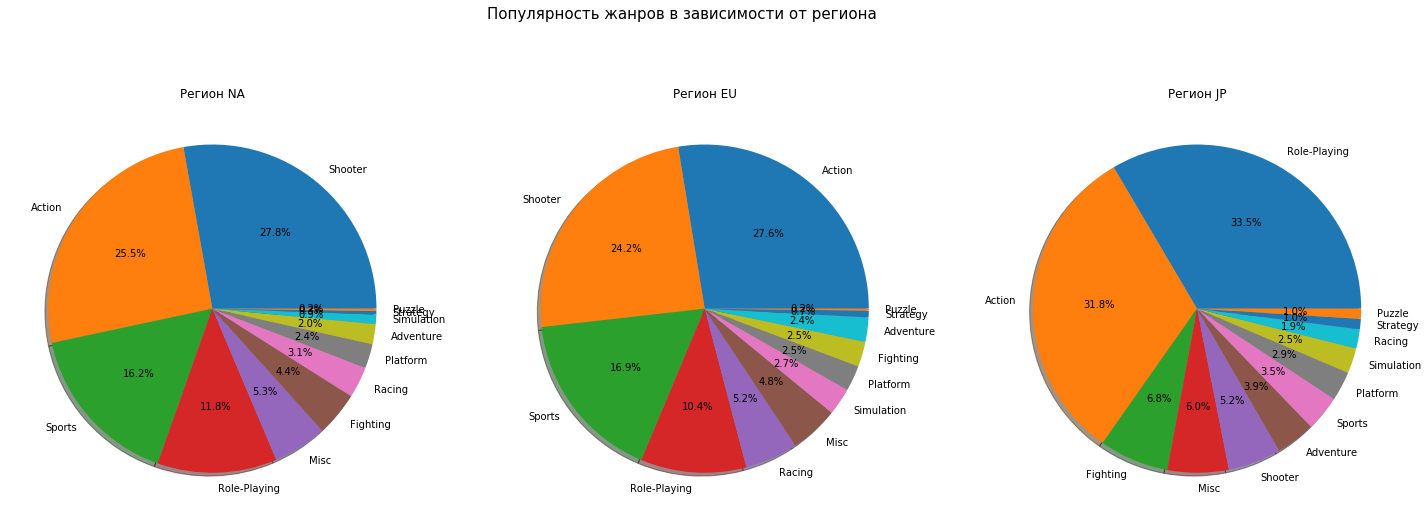

In [32]:
columns = ['na_sales', 'eu_sales', 'jp_sales']

na_genre = games.query('year_of_release >= 2014').pivot_table(index='genre', values='na_sales', aggfunc='sum').\
            sort_values(by='na_sales', ascending=False)
eu_genre = games.query('year_of_release >= 2014').pivot_table(index='genre', values='eu_sales', aggfunc='sum').\
            sort_values(by='eu_sales', ascending=False)
jp_genre = games.query('year_of_release >= 2014').pivot_table(index='genre', values='jp_sales', aggfunc='sum').\
            sort_values(by='jp_sales', ascending=False)


fig, axs = plt.subplots(nrows=1 , ncols=3, figsize=(25, 25))

plt.suptitle('Популярность жанров в зависимости от региона', fontsize=15)
plt.subplots_adjust(top=1.5)
    
axs[0].pie(na_genre, labels=na_genre.reset_index()['genre'], autopct='%1.1f%%', shadow=True)

axs[1].pie(eu_genre, labels=eu_genre.reset_index()['genre'], autopct='%1.1f%%', shadow=True)

axs[2].pie(jp_genre, labels=jp_genre.reset_index()['genre'], autopct='%1.1f%%', shadow=True)

axs[0].set_title('Регион NA')
axs[1].set_title('Регион EU')
axs[2].set_title('Регион JP')

plt.show()

**ВЫВОД:**

Как и в случае с платформами, тенденции по жанрам в Европе и Америке очень схожие, ТОР-5 для этих регионов очень похож:
- для NA: Shooter, Action, Sports, Role-Playing, Misc 
- для EU: Action, Shooter, Sports, Role-Playing, Racing

Япония заметно отличается. ТОП-5 Японии: Role-Playing, Action, Fighting, Misc, Sports, Shooter.

#### 4.3. Влияет ли рейтинг ESRB на продажи в отдельном регионе?

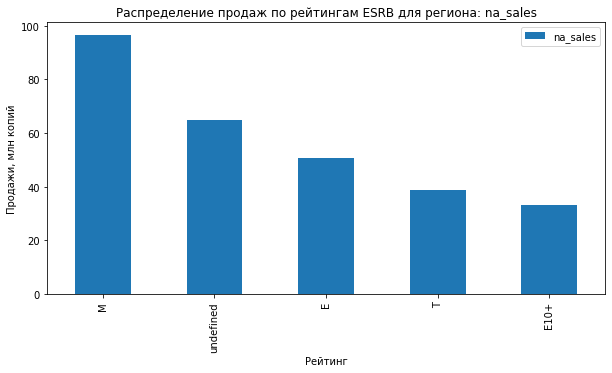


Продажи в зависимости от рейтинга ESRB для региона: na_sales

           na_sales
rating             
M             96.42
undefined     64.72
E             50.74
T             38.95
E10+          33.23





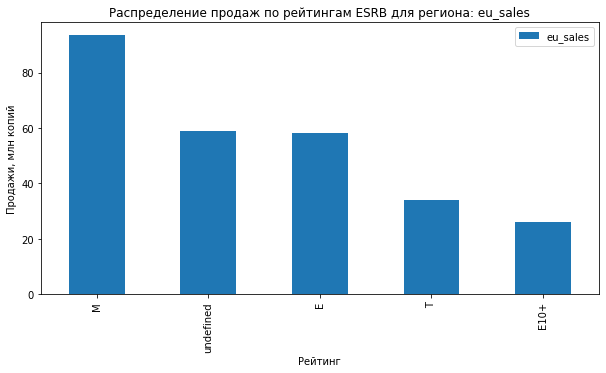


Продажи в зависимости от рейтинга ESRB для региона: eu_sales

           eu_sales
rating             
M             93.44
undefined     58.95
E             58.06
T             34.07
E10+          26.16





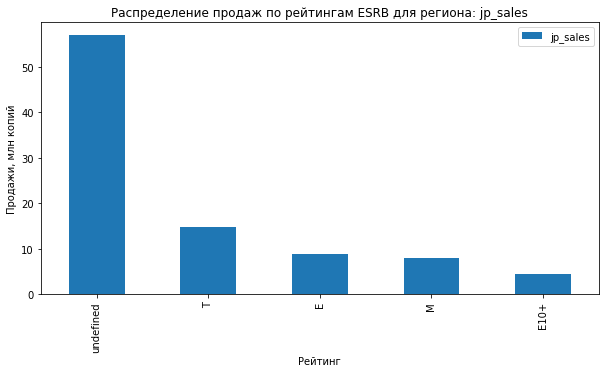


Продажи в зависимости от рейтинга ESRB для региона: jp_sales

           jp_sales
rating             
undefined     56.90
T             14.78
E              8.94
M              8.01
E10+           4.46





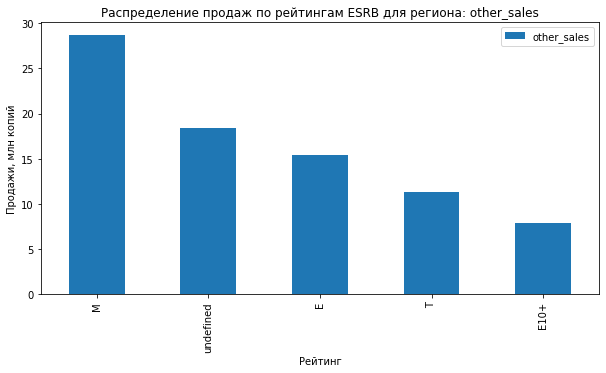


Продажи в зависимости от рейтинга ESRB для региона: other_sales

           other_sales
rating                
M                28.67
undefined        18.40
E                15.39
T                11.33
E10+              7.83





In [33]:
columns = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']

for col in columns:
    games.query('year_of_release >= 2014').\
    pivot_table(index='rating', values=col, aggfunc='sum').\
    sort_values(by=col, ascending=False).\
    plot(y=col, kind='bar', figsize=(10,5), title='Распределение продаж по рейтингам ESRB для региона: '+col)
    plt.xlabel('Рейтинг')
    plt.ylabel('Продажи, млн копий')
    plt.show()
    print()
    print('Продажи в зависимости от рейтинга ESRB для региона: '+col)
    print()
    print(games.query('year_of_release >= 2014').\
          pivot_table(index='rating', values=col, aggfunc='sum').\
          sort_values(by=col, ascending=False))
    print()
    print()
    print()

**ВЫВОД**

Если анализировать продажи в зависимости от рейтингов в каждом регионе, то видно, что отличия довольно ощутимые.

В Европе и Америке самые продаваемые игры - с рейтингом М (Mature 17+). Однако при этом довольно существенная доля продаж у игр с рейтингами undefined, Е(Everyone), Т(Teen), Е10+(Everyone 10+). 

В Японии самые продаваемые игры - с неопределенным рейтингом, затем в порядке уменьшения количества проданных копий идут рейтинги Т, E, М и Е10+. Можно сказать, что рейтинг ESRB не влияет на продажи в Японии.
Продажи детских игр не существенны, если сравнивать с другими регионами.

На игры с неопределенным рейтингом во всех регионах приходится довольно значительная доля продаж. Это связано с тем, что примерно 1/3 часть данных идет без указания рейтинга. Для более детального исследования необходимо получить данные, в которых эти пропуски будут заполнены актуальными значениями ESRB. 

### 5. Проверка гипотез.

**5.1. Гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.**

Нулевая гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC равны.

Альтернативная гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC не равны.

In [34]:
# Проверим размеры выборок с учетом пропусков в данных

array_xone = games.query('platform == "XOne" and year_of_release >= 2014')['user_score'].dropna()
array_pc = games.query('platform == "PC" and year_of_release >= 2014')['user_score'].dropna()

print('Размеры выборок: для платформы XOne -',len(array_xone),'для платформы PC -',len(array_pc))

Размеры выборок: для платформы XOne - 165 для платформы PC - 122


Выборки достаточно большие, но не равные по размеру, поэтому при проведении теста параметр equal_var укажем как False.

In [35]:
alpha = .05 

results = st.ttest_ind(array_xone, array_pc, equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 0.11601398086668832
Не получилось отвергнуть нулевую гипотезу


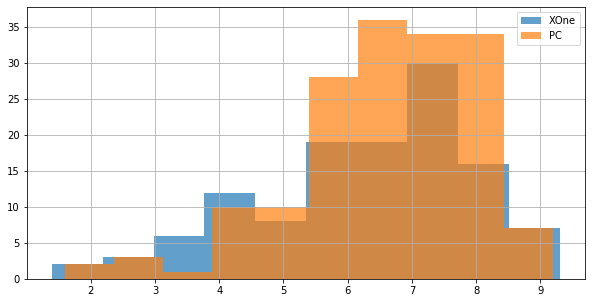

In [36]:
array_pc.hist(alpha = 0.7, figsize=(10,5))
array_xone.hist(alpha = 0.7, figsize=(10,5))
plt.legend(['XOne', 'PC'])
plt.show()

**ВЫВОД:**
Не получилось отвергнуть нулевую гипотезу. Средние пользовательские рейтинги платформ Xbox One и PC равны.

**5.2. Гипотеза: Средние пользовательские рейтинги жанров Action и Sports разные.**

Нулевая гипотеза: Средние пользовательские рейтинги жанров Action и Sports равны.

Альтернативная гипотеза: Средние пользовательские рейтинги жанров Action и Sports не равны.

In [37]:
# Проверим размеры выборок с учетом пропусков в данных

array_action = games.query('genre == "Action" and year_of_release >= 2014')['user_score'].dropna()
array_sports = games.query('genre == "Sports" and year_of_release >= 2014')['user_score'].dropna()

print('Размеры выборок: для жанра Action -',len(array_action),'для жанра Sports -',len(array_sports))

Размеры выборок: для жанра Action - 297 для жанра Sports - 127


Выборки достаточно большие, но не равные по размеру, поэтому при проведении теста параметр equal_var укажем как False.

In [38]:
alpha = .05 

results = st.ttest_ind(array_action, array_sports, equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 1.1825550382644557e-14
Отвергаем нулевую гипотезу


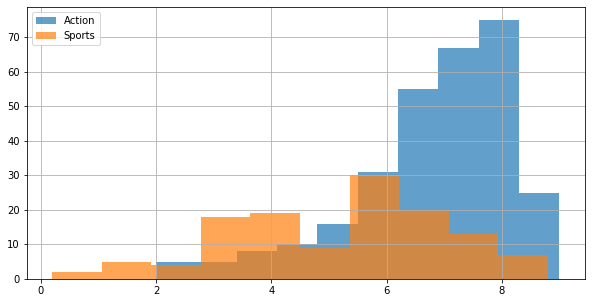

In [39]:
array_action.hist(alpha = 0.7, figsize=(10,5))
array_sports.hist(alpha = 0.7, figsize=(10,5))
plt.legend(['Action', 'Sports'])
plt.show()

**ВЫВОД:** Отвергаем нулевую гипотезу. Средние пользовательские рейтинги жанров Action и Sports не равны.

### 6. Общий вывод.

Интернет-магазину "Стримчик" при планировании рекламной компании на 2017 год необходимо учесть следующее:


1. Потенциально прибыльными являются платформы:

   **PS4** - лидер среди потенциально прибыльных платформ с показателем 69.25 млн проданных копий в 2016г.

   **XOne** - показатель продаж к году снижается, но тем не менее все еще значительный - 26.15 млн копий в 2016-м.

   **3DS** - несмотря на то, что продажи к 2016году упали в четыре раза по сравнению со стартовым 2011-м годом (и почти вдвое по сравнению с предыдущим 2015-м), эта платформа все еще показывает неплохой результат по сравнению с другими - 15млн проданных копий.

   **PC** - продажи в 2016-м составили 5.25 млн проданных копий.

   **WiiU** - продажи в 2016-м составили 4.6 млн проданных копий.



2. Для выбранного актуального периода с 2014г по 2016г характерны следующие закономерности:

   - Самые большие продажи у игр на базе платформ PS4 и XOne. В целом, нормальные  продажи по этим лидерам не отличаются существенно и находятся в одном диапазоне - до 2 млн. Средние значения также находятся в одном диапазоне - примерно около 0.7-0.8 млн копий. Большая часть нормальных значений лежит в диапазоне до 1 млн. Для обеих платформ характерно наличие значительного количества выбросов с аномально высокими значениями продаж.
   -  Средние показатели у платформ WiiU и 3DS, однако здесь отличия более существенные: у WiiU среднее 0.56млн и большая часть нормальных значений лежит в диапазоне до 0.52млн; у 3DS среднее 0.5, однако большая часть нормальных значений лежит в диапазоне до 0.32млн. У 3DS значительно больше выбросов.
   - Самые низкие продажи у платформы РС: средние 0.23 и 0.13 млн соответсвенно, продажи в диапазоне до 0.2млн. 


3. Оценка как критиков, так и пользователей не существенно влияет на продажи.
И в том, и в другом случае основная масса - это продукт с оценкой от 4 до 8 (в случае с пользователями) или от 40 до 80 (критики) и продажами до 0.5 млн.
Игры с оценками от 6 до 8 и от 60 до 80 характеризуются как продажами до 0.5, так и 0.5-1млн.
Однако, у игр с продажами 1-1.5млн оценки пользователей также лежат в пределах 6-8. Правда, оценки критиков для игр с такими продажами выше - от 70 до 90.
Зависимость продаж от оценок критиков - прямая, поскольку коэффициенты корреляции положительные.
Зависимость продаж от оценок пользователей характеризуется как положительными (платформы XOne, 3DS, WiiU), так и отрицательными значениями коэффициента корреляции (платформы PS4 и PC).
Сравнение коэффициентов корреляции говорит о том, что зависимость продаж от оценки критиков сильнее, чем от оценки пользователей. Зависимость продаж от оценки пользователей, хоть и есть, но откровенно слабее.


4. Самые прибыльные жанры (суммарно по всем регионам): 
   - Action - 199 млн проданных копий за актуальный период, что составляет 27.3% от общих продаж, и Shooter - 171 млн проданных копий за актуальный период, что составляет 23.4% от общих продаж.
   - Второе место делят Sports (15%) и Role-Playing (14%) - 109 и 101 млн за актуальный период соответсвенно.
   - Далее идут 8 жанров с суммарными продажами 20 % на всех: Misc, Platform, Rasing, Fighting, Simulation, Adventure, Strategy и Puzzle. Strategy(4млн, что составляет 0.5%) и Puzzle(2.2 млн - это всего 0.3%) - самые малопродаваемые (видимо потому, что сложные).


5. TOP-5 платформ для Северной Америки (NA) в порядке уменьшения доли продаж: PS4, XOne, X360, 3DS, PS3. Из них "живыми" и потенциально прибыльными являются PS4, XOne и 3DS.

   TOP-5 платформ для Eвропы (EU) в порядке уменьшения доли продаж: PS4, XOne, PS3, PC, 3DS. Из них "живыми" и потенциально прибыльными являются PS4, XOne, PC, 3DS. То есть не актуальная только одна - PS3.

   Америка и Европа практически полностью совпадают в своих предпочтениях: в TOP-5 входят одни и те же платформы. Долю продаж перетягивают на себя устаревшие платформы X360 и PS3 - видимо, за счет бума выпуска новых игр, который пришелся на период до 2014г. Однако, платформы, которые мы определили как перспективные, также входят в ТОП-5 и занимают значительную долю рынка. Нашу рекламную кампанию на 2017г необходимо спланировать с опорой именно на эти перспективные платформы с поправкой на регион.

   TOP-5 платформ для Японии (JP) кардинально отличается: 3DS, PS4, PSV, PS3, WiiU. Из перспективных в ТОП-5 попали платформы 3DS, PS4 и WiiU. В Японском TOP-5 частично присутствуют лидеры американского и европейского рынка, однако налицо совершенно иное распределение мест. Практически половина продаж японского рынка принадлежит платформе 3DS, которая в европейском и американском ТОР-5 только на 4-5 местах.

   Для всех остальных регионов (категория other_sales) ТОП-5 выглядит так: PS4, XOne, PS3, X360, 3DS. Перспективные тут PS4, XOne, и 3DS.


6. Как и в случае с платформами, тенденции по жанрам в Европе и Америке очень схожие, ТОР-5 для этих регионов очень похож:
   - для NA: Shooter, Action, Sports, Role-Playing, Misc
   - для EU: Action, Shooter, Sports, Role-Playing, Racing

   Япония заметно отличается. ТОП-5 Японии: Role-Playing, Action, Fighting, Misc, Sports, Shooter.


7. В Европе и Америке самые продаваемые игры - с рейтингом М (Mature 17+). Однако при этом довольно существенная доля продаж у игр с рейтингами undefined, Е(Everyone), Т(Teen), Е10+(Everyone 10+).

   В Японии самые продаваемые игры - с неопределенным рейтингом, затем в порядке уменьшения количества проданных копий идут рейтинги Т, E, М и Е10+. Можно сказать, что рейтинг ESRB не влияет на продажи в Японии. Продажи детских игр не существенны, если сравнивать с другими регионами.

   На игры с неопределенным рейтингом во всех регионах приходится довольно значительная доля продаж. Это связано с тем, что примерно 1/3 часть данных идет без указания рейтинга. Для более детального исследования необходимо получить данные, в которых эти пропуски будут заполнены актуальными значениями ESRB.


8. Если "Стримчик" ориентирован на российский рынок, то при планировании ассортимента стоит руководствоваться тенденцями для европейского рынка, а именно:
   - TOP-5 платформ: PS4, XOne, PS3, PC, 3DS;
   - TOP-5 жанров: Action, Shooter, Sports, Role-Playing, Racing
   - самые продаваемые игры - с рейтингом М. Кроме того, необходимо представить в ассортименте продукты с рейтингами Е, Т, Е+10, поскольку они также очень востребованы.